In [121]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import math as m

#input 
GMsun, Rsun, gam = 1.3271244e26, 6.95700e10, 5/3.
kB, m_unit,  hP_nobar = 1.380649e-16, 1.66053906660e-24, 6.62607015e-27  # Boltzman k [erg / K], atomic mass unit [g], planck constant [erg s]
Mwd, Rwd = 0.6, 0.01*Rsun
g = GMsun * Mwd / Rwd**2.0 # [cm s-2] grav acceleration
a = 10**(-1.) #[g s-1 cm-2] local acc tempo 

erg = 624150636.309 # [erg in keV]
Hz = 2418.38e14 # [Hz in keV]

vff=np.sqrt(2*GMsun * Mwd / Rwd)
v0 = 1/4. * vff
rho0= a / v0
P0 = 3*a*v0

In [122]:
def pend(y,z,a,gam,f_cool,g):
    return np.array([g*a/y[1] - a*(-(gam - 1)*f_cool - a*g)/(gam*y[0] - a*y[1]), (-(gam - 1)*f_cool - a*g)/(gam*y[0] - a*y[1])])

def RK4(f, y0, z, h, args=()):
    y=np.zeros(len(y0))
    k1 = f(y0, z, *args)
    k2 = f(y0 + h*k1/2.0, z + h/2.0, *args)
    k3 = f(y0 + h*k2/2.0, z + h/2.0, *args)
    k4 = f(y0 + h*k3, z + h, *args)
    y = y0 + (h / 6.) * (k1 + 2*k2 + 2*k3 + k4)
    return y 

In [123]:
p, v, rho, z, h = P0, v0, rho0, 0, 0.001*Rwd
y = np.array([p, v]) # array of border conditions
P, Vels, Rho, Z_s, Temp= [], [], [], [], []

P.append(p), Vels.append(v), Rho.append(rho0), Z_s.append(z), Temp.append(p/kB/(rho/m_unit))

while v > 0:
    n_e = rho / m_unit # [g cm-3]
    T = p / n_e / kB
    f_cool = 2.4 * 10**(-27.) * T**(1/2.) * n_e**(2.) # cooling function, [erg cm-3 s-1]

    sol = RK4(pend, y, z, h, args=(a, gam, f_cool, g))
    if (sol[1] < 0):
        print(z+h)
        print((z+h) / Rwd)
        break
    
    P.append(sol[0])
    Vels.append(sol[1])
    Rho.append(a / sol[1])
    Temp.append(T)
    Z_s.append(z+h)

    z+=h
    p, v, rho=sol[0], sol[1], a / sol[1]
    y=np.array([p, v])
    #print("z:", z, "v:", v, "p:", p, "ro:", rho)

P, Vels, Rho, Z_s, Temp = np.array(P), np.array(Vels), np.array(Rho), np.array(Z_s), np.array(Temp)    

189926100.0
0.273


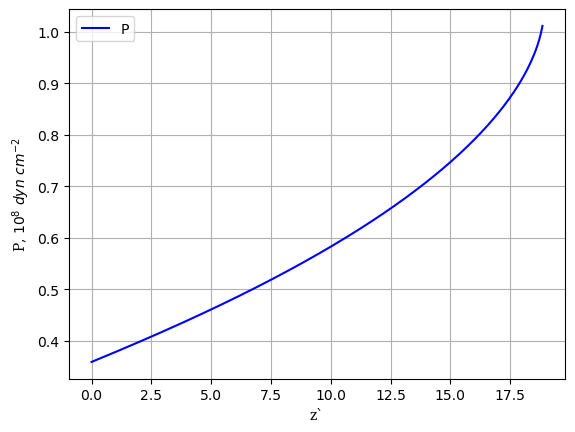

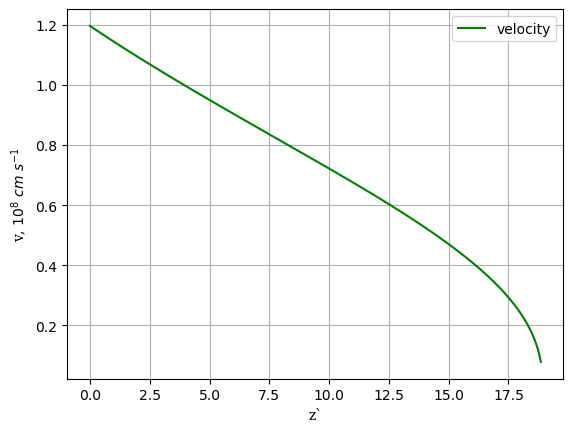

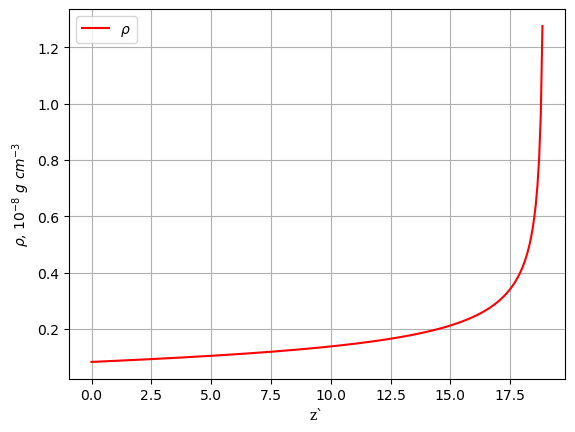

In [124]:
csfont={'fontname': 'Serif'}
plt.figure()
plt.plot(Z_s[:len(P)-1]/10**(7), P[:len(P)-1]/10**(8), '-b', label='P')
plt.legend(loc='best')
plt.ylabel('P, $10^8~dyn~cm^{-2}$', **csfont)
plt.xlabel('z`', **csfont)
plt.grid()
plt.show()

plt.figure()
plt.plot(Z_s[:len(P)-1]/10**(7), Vels[:len(P)-1]/10**(8), '-g', label='velocity')
plt.legend(loc='best')
plt.ylabel('v, $10^8~cm~s^{-1}$', **csfont)
plt.xlabel('z`', **csfont)
plt.grid()
plt.show()

plt.figure()
plt.plot(Z_s[:len(P)-1]/10**(7), Rho[:len(P)-1]/10**(-8), '-r', label='$\\rho$')
plt.legend(loc='best')
plt.ylabel('$\\rho$, $10^{-8}~g~ cm^{-3}$', **csfont)
plt.xlabel('z`', **csfont)
plt.grid()
plt.show()

In [118]:
def j_z(T, rho, E):
    return 9.52*10**(-38) * (rho/m_unit)**2. * T**(-1/2.) * (E/kB/T)**(-0.4) * np.exp(-E/kB/T) #/ 4.135667696 / 10**(-15) # [erg s-1 cm-3 Hz-1]

freq=np.linspace(1e15, 1e20, 1000)
J=[]

for i in range(len(freq)):
    I_trap=0
    for m in range(1, len(P)-1):
        I_trap+=(j_z(Temp[m], Rho[m], hP_nobar*freq[i]) + j_z(Temp[m-1], Rho[m-1], hP_nobar*freq[i])) / 2. * (Z_s[m] - Z_s[m-1])  
    J.append(I_trap/4e-18)
J9=np.array(J)


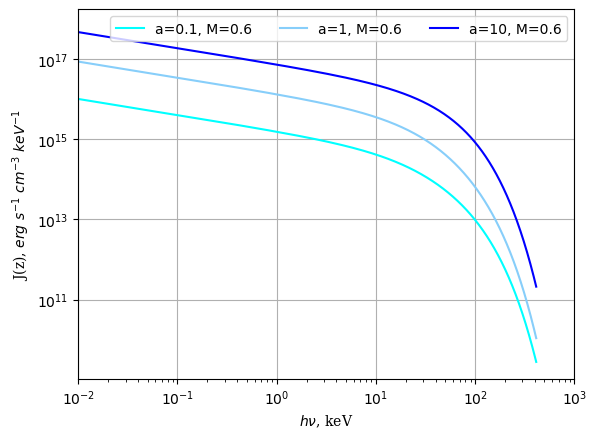

In [126]:
plt.figure()
'''plt.plot(hP_nobar*freq*erg, J2, '-y', label='a=0.1, M=1')
plt.plot(hP_nobar*freq*erg, J1, '-g', label='a=1, M=1')
plt.plot(hP_nobar*freq*erg, J3, '-', color='lightgreen', label='a=10, M=1')
plt.plot(hP_nobar*freq*erg, J4, '-r', label='a=0.1, M=0.8')
plt.plot(hP_nobar*freq*erg, J5, '-', color='salmon', label='a=1, M=0.8')
plt.plot(hP_nobar*freq*erg, J6, '-', color='brown', label='a=10, M=0.8')'''
plt.plot(hP_nobar*freq*erg, J7, '-', color='cyan', label='a=0.1, M=0.6')
plt.plot(hP_nobar*freq*erg, J8, '-', color='lightskyblue', label='a=1, M=0.6')
plt.plot(hP_nobar*freq*erg, J9, '-b', label='a=10, M=0.6')
plt.legend(loc='best', ncol=3)
plt.ylabel('J(z), $erg~ s^{-1}~ cm^{-3}~ keV^{-1}$', **csfont)
plt.xlabel('$h\\nu$, keV', **csfont)

plt.xlim([0.01, 1000])
#plt.yscale('log')
#plt.gca().invert_yaxis()
#plt.xscale('log')
#plt.ylim([1e-16, 1e-19])
plt.xscale('log')
plt.yscale('log')
plt.grid()
plt.show()